# 군집분석
  - 비지도 학습 : 정답이 없다
  - 지도 학습 : 회귀, 분류

In [136]:
# 소비자의 군집분석(타겟 마케팅)

# k-평균 알고리즘: kluster 군집의 개수
  - 임의의 K 개수만큼 점을 찍고 각 점과 데이터사이의 거리를계산(유클리디안 거리의 제곱)한 다음 평균지점으로 이동을 계속 하면서 더 이상 이동 할 수 없을때 까지 이동한다.
  - 단점 : 클러스터의 개수를 직접 지정
    - 적합한 개수는 : 엘보우 기법으로 확인한다
  - 엘보우기법
    - 왜곡 : 중심점과 데이터의 거리의 제곱합
    - K 개수를 늘리면서 그래프를 그려보면 꺽이는 지점
  - 실루엣 분석 : 시각화
    - 클러스터내에 있는 데이터가 얼마나 모여있는지 측정하는 도구
    - 실루엣 계수 : -1 ~ 1사이의 값을 가진다 1에 가까울 수록 좋은 군집화
  


In [137]:
!pip install ucimlrepo

In [138]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

In [139]:
X.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [141]:
# 이 데이터의 핵심은 고객에 대한 마케팅... 고객중요
# 고객 번호가 없는데이터는?

In [142]:
idx = X.isna().apply(lambda x: x.any(), axis=1)
X[idx]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...
541536,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [143]:
X[X['Description'].isna()]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...
535322,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [144]:
# Description null인 데이터는 제거한다
X = X.dropna(subset=['Description'])

In [145]:
X.reset_index(drop=True, inplace=True)

In [146]:
# 중복데이터 제거
X.drop_duplicates(inplace=True)

<ipython-input-146-44cff28894ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop_duplicates(inplace=True)


In [147]:
X.reset_index(drop=True, inplace=True)

In [148]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534532 entries, 0 to 534531
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  534532 non-null  object 
 1   Quantity     534532 non-null  int64  
 2   InvoiceDate  534532 non-null  object 
 3   UnitPrice    534532 non-null  float64
 4   CustomerID   401528 non-null  float64
 5   Country      534532 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.5+ MB


In [149]:
X.iloc[1400:1427]

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1400,JUMBO STORAGE BAG SUKI,40,12/1/2010 14:11,1.95,16456.0,United Kingdom
1401,JUMBO BAG TOYS,20,12/1/2010 14:11,1.95,16456.0,United Kingdom
1402,JUMBO BAG OWLS,30,12/1/2010 14:11,1.95,16456.0,United Kingdom
1403,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/2010 14:11,2.95,16456.0,United Kingdom
1404,HAND WARMER RED RETROSPOT,-1,12/1/2010 14:30,2.10,17841.0,United Kingdom
1405,CHARLOTTE BAG SUKI DESIGN,-2,12/1/2010 14:30,0.85,17841.0,United Kingdom
1406,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1407,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1408,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1409,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [150]:
# CustomerID가 null인 항목 제외

# idx = X['CustomerID'].isna()
# X = X[~idx]
X.dropna(subset=['CustomerID'], inplace=True)

<ipython-input-150-b3e99bcc33c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(subset=['CustomerID'], inplace=True)


In [151]:
X.shape

(401528, 6)

In [152]:
# Quantity 값이 양수인 데이터 추출
idx = X['Quantity'] > 0
X = X[idx]
X.shape

(392657, 6)

In [153]:
X.head(20)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [154]:
# 거래와 관련된 도메인 지식이 필요하고. 거래의 특성을 나타내는 컬럼이 필요
# 제품수, 거래건수, 고객수 를 구해보자
product_count = X['Description'].value_counts().shape[0]
transaction_count = X['InvoiceDate'].value_counts().shape[0]
customer_count = X['CustomerID'].value_counts().shape[0]

In [155]:
import pandas as pd
pd.DataFrame(data=[product_count, transaction_count, customer_count], index=['제품수', '거래건수', '고객수'],columns=['counts'])

,counts
제품수,3877
거래건수,17286
고객수,4339


In [156]:
# X 데이터에 총 거래건수를 추가  SaleAcount
X['SaleAmount'] = X['Quantity'] * X['UnitPrice']
X.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [157]:
# 고객의 주문 횟수, 주문 총액, 주문 후 며칠이 지났는지에 대한 정보를 추출
# 고객의 마지막 주문일

In [158]:
InvoiceDate_groupby_c_df = X.groupby('CustomerID')['InvoiceDate'].count()
SaleAmount_groupby_df = X.groupby('CustomerID')['SaleAmount'].sum()
InvoiceDate_groupby_m_df = X.groupby('CustomerID')['InvoiceDate'].max()
retail_df = pd.concat([InvoiceDate_groupby_c_df, SaleAmount_groupby_df, InvoiceDate_groupby_m_df], axis=1).reset_index()

In [159]:
# retail_df = X.groupby('CustomerID').agg(
#     {
#         'InvoiceDate':'count',
#         'SaleAmount':'sum',
#         # 'InvoiceDate':'max'
#     }
# )

# CustomerID는 정수로 표현하는 계산하기 좋음
retail_df['CustomerID'] = retail_df['CustomerID'].astype('int')
retail_df.columns = ['CustomerID', 'Frequency', 'SaleAmount', 'LastPurchaseDate']
retail_df.head()

,CustomerID,Frequency,SaleAmount,LastPurchaseDate
0,12346,1,77183.60,1/18/2011 10:01
1,12347,182,4310.00,8/2/2011 8:48
2,12348,31,1797.24,9/25/2011 13:13
3,12349,73,1757.55,11/21/2011 9:51
4,12350,17,334.40,2/2/2011 16:01


In [160]:
#retail_df.rename(columns={
#    'InvoiceDate':'LastPurchaseDate'
#}, inplace=True)
# 문자열 날자를 날자데이털 변환
retail_df['LastPurchaseDate'] = pd.to_datetime(retail_df['LastPurchaseDate'])
retail_df.head()

,CustomerID,Frequency,SaleAmount,LastPurchaseDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-08-02 08:48:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [161]:
retail_df['LastPurchaseDate'].astype('datetime64[ns]')

,LastPurchaseDate
0,2011-01-18 10:01:00
1,2011-08-02 08:48:00
2,2011-09-25 13:13:00
3,2011-11-21 09:51:00
4,2011-02-02 16:01:00
...,...
4334,2011-03-07 09:52:00
4335,2011-06-12 10:53:00
4336,2011-08-05 13:35:00
4337,2011-09-05 12:35:00


In [162]:
# 오늘날자를 기준으로 구매한지 얼마나 지났는지 계산
# 오늘 날자를 datetime64[ns] 표현
from datetime import datetime
today = datetime.now()
today

datetime.datetime(2024, 8, 14, 12, 13, 7, 792036)

In [163]:
retail_df['ElapsedDays']  = today - retail_df['LastPurchaseDate']

In [164]:
retail_df.head()

,CustomerID,Frequency,SaleAmount,LastPurchaseDate,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00,4957 days 02:12:07.792036
1,12347,182,4310.00,2011-08-02 08:48:00,4761 days 03:25:07.792036
2,12348,31,1797.24,2011-09-25 13:13:00,4706 days 23:00:07.792036
3,12349,73,1757.55,2011-11-21 09:51:00,4650 days 02:22:07.792036
4,12350,17,334.40,2011-02-02 16:01:00,4941 days 20:12:07.792036


In [165]:
temp = today - retail_df['LastPurchaseDate'][0]
temp.days

4957

In [166]:
# ElapsedDays 항목중에서 days만 남기기
retail_df['ElapsedDays'] = retail_df['ElapsedDays'].apply(lambda x: x.days)

In [167]:
retail_df.head()

,CustomerID,Frequency,SaleAmount,LastPurchaseDate,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00,4957
1,12347,182,4310.00,2011-08-02 08:48:00,4761
2,12348,31,1797.24,2011-09-25 13:13:00,4706
3,12349,73,1757.55,2011-11-21 09:51:00,4650
4,12350,17,334.40,2011-02-02 16:01:00,4941


In [168]:
# LastPurchaseDate 제거
retail_df.drop(columns=['LastPurchaseDate'], inplace=True)

In [169]:
retail_df

,CustomerID,Frequency,SaleAmount,ElapsedDays
0,12346,1,77183.60,4957
1,12347,182,4310.00,4761
2,12348,31,1797.24,4706
3,12349,73,1757.55,4650
4,12350,17,334.40,4941
...,...,...,...,...
4334,18280,10,180.60,4909
4335,18281,7,80.82,4812
4336,18282,12,178.05,4757
4337,18283,721,2045.53,4726


데이터 분포 조정

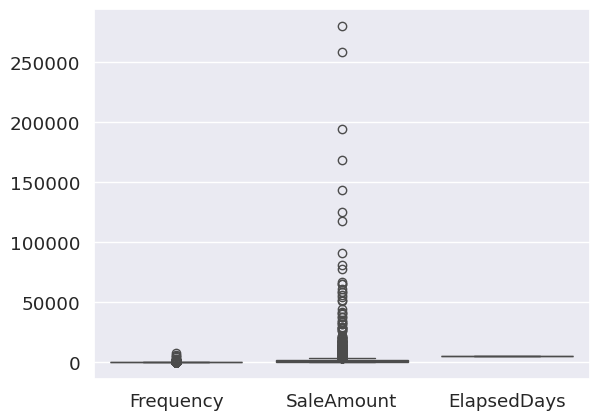

In [170]:
# Frequency	SaleAmount	ElapsedDays boxplot 그리기
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
sns.boxplot(data=retail_df[['Frequency', 'SaleAmount', 'ElapsedDays']])
plt.show()


데이터는 아웃레이어가 많음 : 로그함수를 이용해서 고르게 펴준다

In [171]:
import numpy as np
retail_df['LogFrequency'] = retail_df['Frequency'].apply(lambda x: np.log(x))
retail_df['LogSaleAmount'] = retail_df['SaleAmount'].apply(lambda x: np.log(x))
retail_df['LogElapsedDays'] = retail_df['ElapsedDays'].apply(lambda x: np.log(x))

<ipython-input-171-9db838849a1c>:3: RuntimeWarning: divide by zero encountered in log
  retail_df['LogSaleAmount'] = retail_df['SaleAmount'].apply(lambda x: np.log(x))


In [172]:
retail_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,CustomerID,Frequency,SaleAmount,ElapsedDays,LogFrequency,LogSaleAmount,LogElapsedDays
0,12346,1,77183.60,4957,0.000000,11.253942,8.508556
1,12347,182,4310.00,4761,5.204007,8.368693,8.468213
2,12348,31,1797.24,4706,3.433987,7.494007,8.456594
3,12349,73,1757.55,4650,4.290459,7.471676,8.444622
4,12350,17,334.40,4941,2.833213,5.812338,8.505323


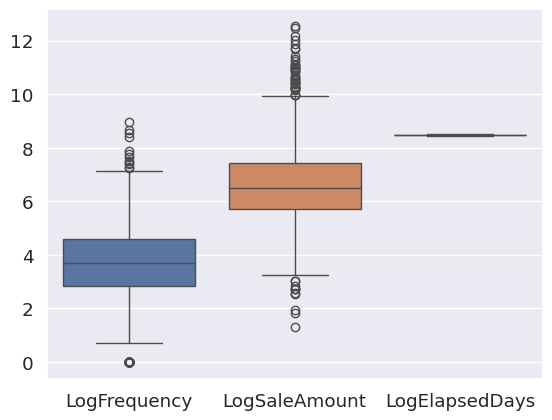

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
sns.boxplot(data=retail_df[['LogFrequency', 'LogSaleAmount', 'LogElapsedDays']])
plt.show()

정규화
   - boxplot으로 이상치여부 확인



In [174]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [190]:
# nan or infinity 처리하기
retail_df.replace([np.inf, -np.inf], np.nan, inplace=True)
retail_df.fillna(0, inplace=True)

In [191]:
X_features = retail_df[['LogFrequency','LogSaleAmount',	'LogElapsedDays']]
X_features_scaled = scaler.fit_transform(X_features)

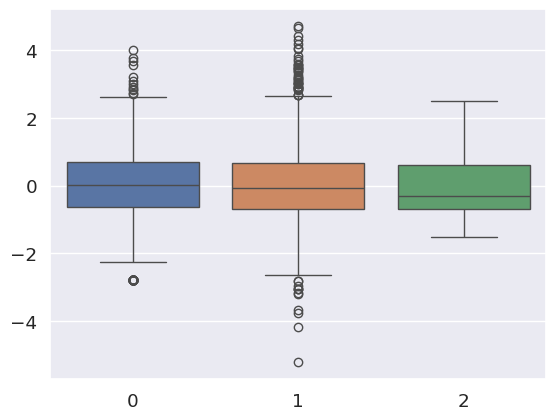

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
sns.boxplot(data=X_features_scaled)
plt.show()

In [193]:
# log 변환 또는 정규화를 통해 데이터를 정규분포형태로 변환

분석모델 구축

In [194]:
# k 평균 군집화 k means 모델
# 실루엣 계수사용 라이브러리 임포트
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

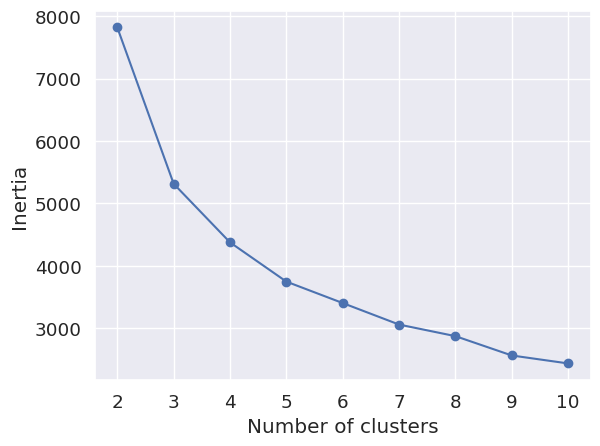

In [199]:
result = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=0,n_init='auto')
  kmeans.fit(X_features_scaled)
  result.append(kmeans.inertia_)  # 왜곡값

plt.plot(range(2,11), result,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [200]:
# 최적의 클러스터를 찾았기 때문에  모델을 다시 구성 k=3
kmeans = KMeans(n_clusters=3, random_state=0,n_init='auto')
kmeans.fit(X_features_scaled)
y_labels = kmeans.predict(X_features_scaled)
y_labels


array([0, 2, 2, ..., 1, 2, 2], dtype=int32)

In [203]:
retail_df['clusterLabel'] = y_labels
retail_df.head()

,CustomerID,Frequency,SaleAmount,ElapsedDays,LogFrequency,LogSaleAmount,LogElapsedDays,clusterLabel
0,12346,1,77183.60,4957,0.000000,11.253942,8.508556,0
1,12347,182,4310.00,4761,5.204007,8.368693,8.468213,2
2,12348,31,1797.24,4706,3.433987,7.494007,8.456594,2
3,12349,73,1757.55,4650,4.290459,7.471676,8.444622,2
4,12350,17,334.40,4941,2.833213,5.812338,8.505323,0


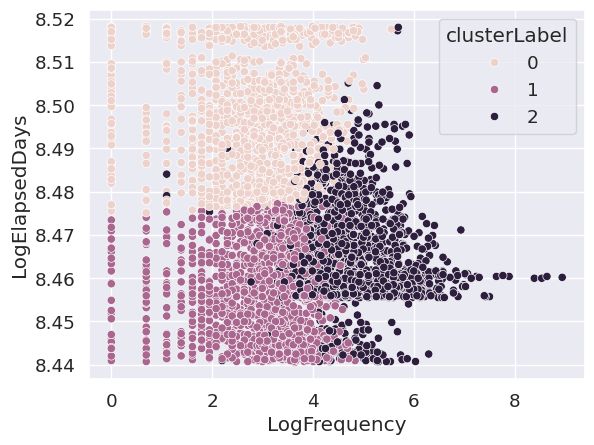

In [206]:
# clusterLabel 에따른 데이터분포를 산점도로 그리기
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)
sns.scatterplot(data=retail_df, x='LogFrequency', y='LogElapsedDays', hue='clusterLabel')
plt.show()

In [217]:
kmeans.cluster_centers_

array([[-0.65960177, -0.66688393,  1.38337319],
       [-0.55794425, -0.582499  , -0.69343645],
       [ 0.87680091,  0.90171982, -0.29504344]])